In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sls
import _utils
import run_search

In [2]:
def search(problem, search_function, pname, sname, hstring, parameter=None):
    ip = _utils.PrintableProblem(problem)
    start = _utils.timer()
    if parameter is not None:
        node = search_function(ip, parameter)
    else:
        node = search_function(ip)
    end = _utils.timer()
    print("\n# Actions   Expansions   Goal Tests   New Nodes")
    print("{}\n".format(ip))
#     _utils.show_solution(node, end - start)
    actions,expansions,goal_tests,new_nodes= str(ip).split()
    return {'pname':pname, 'sname':sname, 'hstring':hstring,'actions':actions,'expansions':expansions,'goal_tests':goal_tests,'new_nodes':new_nodes,'plan_length':len(node.solution()),'time_elapsed':end-start,'solution':node.solution()}

In [3]:
def main(p_choices, s_choices):
    problems = [run_search.PROBLEMS[i-1] for i in map(int, p_choices)]
    searches = [run_search.SEARCHES[i-1] for i in map(int, s_choices)]
    solutions = []

    for pname, problem_fn in problems:
        for sname, search_fn, heuristic in searches:
            hstring = heuristic if not heuristic else " with {}".format(heuristic)
            print("\nSolving {} using {}{}...".format(pname, sname, hstring))

            problem_instance = problem_fn()
            heuristic_fn = None if not heuristic else getattr(problem_instance, heuristic)
            solutions.append(search(problem_instance, search_fn,pname, sname, hstring, heuristic_fn))
    return solutions

In [4]:
sol=main(range(1,len(run_search.PROBLEMS)+1),range(1,len(run_search.SEARCHES)+1))


Solving Air Cargo Problem 1 using breadth_first_search...

# Actions   Expansions   Goal Tests   New Nodes
    20          43          56         178    


Solving Air Cargo Problem 1 using depth_first_graph_search...

# Actions   Expansions   Goal Tests   New Nodes
    20          21          22          84    


Solving Air Cargo Problem 1 using uniform_cost_search...

# Actions   Expansions   Goal Tests   New Nodes
    20          60          62         240    


Solving Air Cargo Problem 1 using greedy_best_first_graph_search with h_unmet_goals...

# Actions   Expansions   Goal Tests   New Nodes
    20          7           9           29    


Solving Air Cargo Problem 1 using greedy_best_first_graph_search with h_pg_levelsum...

# Actions   Expansions   Goal Tests   New Nodes
    20          6           8           28    


Solving Air Cargo Problem 1 using greedy_best_first_graph_search with h_pg_maxlevel...

# Actions   Expansions   Goal Tests   New Nodes
    20          6     

In [5]:
df=pd.DataFrame(sol)

In [6]:
df.to_csv('./statistics.csv')

In [ ]:
df.head()

In [9]:
result=pd.read_csv('./statistics.csv',index_col=0)

In [ ]:
pd.DataFrame({'number_of_nodes':[],'number_of_actions':[],'search_time(s)':[],'length_of_plans':[]})

In [75]:
result.head()

,actions,expansions,goal_tests,hstring,new_nodes,plan_length,pname,sname,solution,time_elapsed
0,20,43,56,NaN,178,6,Air Cargo Problem 1,breadth_first_search,[<aimacode.planning.Action object at 0x1a17f30...,0.004194
1,20,21,22,NaN,84,20,Air Cargo Problem 1,depth_first_graph_search,[<aimacode.planning.Action object at 0x1a17e06...,0.002304
2,20,60,62,NaN,240,6,Air Cargo Problem 1,uniform_cost_search,[<aimacode.planning.Action object at 0x1a17f30...,0.007567
3,20,7,9,with h_unmet_goals,29,6,Air Cargo Problem 1,greedy_best_first_graph_search,[<aimacode.planning.Action object at 0x1a17e06...,0.001263
4,20,6,8,with h_pg_levelsum,28,6,Air Cargo Problem 1,greedy_best_first_graph_search,[<aimacode.planning.Action object at 0x1a17e06...,0.203686


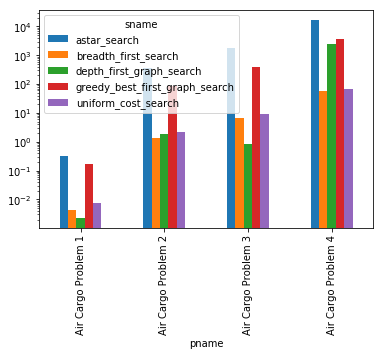

In [104]:
# fig,ax = plt.subplots()
# plt.yscale('log')
from matplotlib.pyplot import figure

result.groupby(['sname','pname']).mean().unstack(0).plot(kind='bar',y='time_elapsed')
plt.yscale('log')

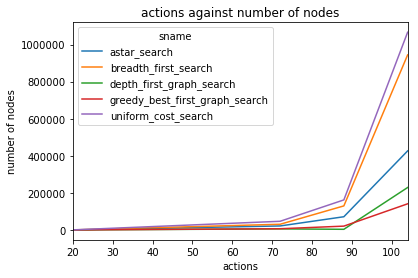

In [154]:
result.groupby(['sname','actions']).mean().unstack(0).plot(y='new_nodes',legend=True)
plt.title('actions against number of nodes')
plt.ylabel('number of nodes')

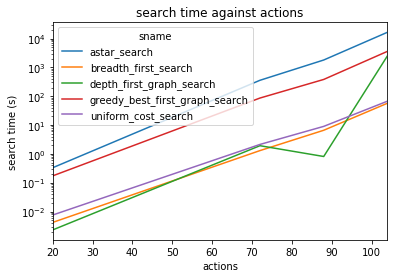

In [151]:
result.groupby(['sname','actions']).mean().unstack(0).plot(y='time_elapsed',legend=True)
plt.yscale('log')
plt.ylabel('search time (s)')
plt.title('search time against actions')

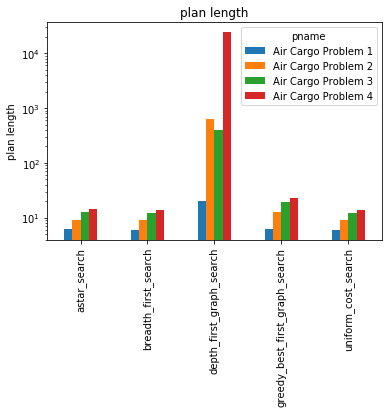

In [137]:
result.groupby(['sname','pname']).mean().unstack().plot(kind='bar',y='plan_length')
plt.yscale('log')
plt.ylabel('plan length')
plt.xlabel('')
plt.title('plan length')

In [ ]:
run_search.SEARCHES

In [ ]:
dir(run_search)

In [ ]:
run_search.main(range(1,len(run_search.PROBLEMS)+1),[1])

In [ ]:
import sys
import io

old_stdout = sys.stdout # Memorize the default stdout stream
sys.stdout = buffer = io.StringIO()

print('123')
a = 'HeLLo WorLd!'
print(a)
# Call your algorithm function.
# etc...

sys.stdout = old_stdout # Put the old stream back in place

whatWasPrinted = buffer.getvalue() # Return a str containing the entire contents of the buffer.
print(whatWasPrinted) # Why not to print it?